# 財政部關務署工作坊

> 資料清理

[數聚點](https://www.datainpoint.com) | 郭耀仁 <https://linktr.ee/yaojenkuo>

```bash
!wget --no-check-certificate https://raw.githubusercontent.com/datainpoint/workshop-customs-gov-tw-2023/main/data.zip
```

```python
import zipfile

local_zip = "/content/data.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content")
zip_ref.close()
```

In [1]:
from string import ascii_uppercase
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 關於資料清理

## 現代資料科學：以程式設計做資料科學的應用

![](images/r-for-data-science.png)

來源：[R for Data Science](https://r4ds.had.co.nz)

## 以程式設計做資料科學的應用場景

- **Import 資料的載入**。
- **Tidy 資料清理**。
- **Transform 資料外型與類別的轉換**。
- Visualise 探索性分析。
- Model 分析與預測模型。
- Communicate 溝通分享。

## （沒什麼用的冷知識）Wrangle

![](https://media.giphy.com/media/MnlZWRFHR4xruE4N2Z/giphy.gif)

來源：<https://media.giphy.com/media/MnlZWRFHR4xruE4N2Z/giphy.gif>

## 機器學習專案花費 50% 的時間處理 Data Wrangling 的相關任務

![](images/average-time-allocated.png)

來源：<https://www.economist.com/technology-quarterly/2020/06/11/for-ai-data-are-harder-to-come-by-than-you-think>

## 多數的資料清理、資料外型與類別的轉換是面對 `DataFrame`

入門 Pandas 的第一步就是掌握 `Index`、`ndarray`、`Series` 與 `DataFrame` 四個資料結構類別彼此之間的關係。

- `Series` 由 `Index` 與 `ndarray` 組合而成。
- `DataFrame` 由數個共享同一個 `Index` 的 `Series` 組合而成。

## `DataFrame` 是有兩個維度的資料結構

- 第一個維度稱為觀測值（Observations），有時亦稱為列（Rows）
- 第二個維度稱為變數（Variables），有時亦稱為欄（Columns）
- 我們習慣以 `(m, n)` 或者 `m x n` 來描述一個具有 `m` 列觀測值、`n` 欄變數的 `DataFrame`

## `DataFrame` 與二維 `ndarray` 不同的地方

- `DataFrame` 的每個變數可以是異質的。
- `DataFrame` 的觀測值具有列標籤（row-label）、變數具有欄標籤（column-label）

## 什麼是乾淨資料

1. 每個變數有自己的欄位。
2. 每個觀測值有自己的資料列。
3. 每個列、欄標籤與值的對應有自己的儲存格。

![](images/tidy-data.png)

來源：<https://r4ds.had.co.nz/tidy-data.html>

## 不乾淨資料有著各自的樣態

> Tidy datasets are all alike, but every messy dataset is messy in its own way.
>
> Hadley Wickham

來源：<https://r4ds.had.co.nz/tidy-data.html>

## 資料清理的對象

- 資料框。
- 文字。
- 圖片。

## 資料框

## 資料來源為中選會選舉資料庫

<https://db.cec.gov.tw/ElecTable/Election>

## 原始資料格式為試算表

我們可以使用 `pd.read_excel()` 函數載入資料。

## 以臺北市的資料為例

In [2]:
file_name = "總統-A05-4-候選人得票數一覽表-各投開票所(臺北市).xls"
spreadsheet_path = "data/總統-各投票所得票明細及概況(Excel檔)/{}".format(file_name)
xl = pd.ExcelFile(spreadsheet_path)
print(xl.sheet_names)

['臺北市']


In [3]:
df = pd.read_excel(spreadsheet_path)
df.head()

,第15任總統副總統選舉候選人在臺北市各投開票所得票數一覽表,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,鄉(鎮、市、區)別,村里別,投票所別,各組候選人得票情形,NaN,NaN,有效票數A\nA=1+2+...+N,無效票數B,投票數C\nC=A+B,已領未投票數\nD\nD=E-C,發出票數E\nE=C+D,用餘票數F,選舉人數G\nG=E+F,投票率H\nH=C÷G
1,NaN,NaN,NaN,(1)\n宋楚瑜\n余湘,(2)\n韓國瑜\n張善政,(3)\n蔡英文\n賴清德,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,總 計,NaN,NaN,"70,769","685,830","875,854","1,632,453","21,381","1,653,834",143,"1,653,977","513,287","2,167,264",76.3098


## 哪些因素使得原本的試算表不是「乾淨資料」？

- 合併儲存格。
- 未定義值、遺漏值。
- 在觀測值中參雜了「小計」與「總計」。
- 資料值（候選人、政黨）記錄在變數名稱中。

## 載入試算表時使用 `skiprows` 參數略過合併儲存格

In [4]:
file_name = "總統-A05-4-候選人得票數一覽表-各投開票所(臺北市).xls"
spreadsheet_path = "data/總統-各投票所得票明細及概況(Excel檔)/{}".format(file_name)
df = pd.read_excel(spreadsheet_path, skiprows=[0, 1, 3, 4], thousands=',')

In [5]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,(1)\n宋楚瑜\n余湘,(2)\n韓國瑜\n張善政,(3)\n蔡英文\n賴清德,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,總 計,NaN,NaN,70769,685830,875854,1632453,21381,1653834,143,1653977,513287,2167264,76.3098
1,松山區,NaN,NaN,5436,55918,64207,125561,1762,127323,2,127325,37329,164654,77.3276
2,NaN,莊敬里,573.0,36,391,429,856,14,870,0,870,230,1100,79.0909
3,NaN,莊敬里,574.0,46,382,438,866,12,878,0,878,259,1137,77.2208
4,NaN,莊敬里,575.0,48,393,389,830,22,852,0,852,262,1114,76.4811


## 更新資料框的 `columns` 屬性

In [6]:
n_cols = df.columns.size
n_candidates = n_cols - 11
id_vars = ['town', 'village', 'office']
candidates = list(df.columns[3:(3 + n_candidates)])
office_cols = list(ascii_uppercase[:8])
col_names = id_vars + candidates + office_cols
df.columns = col_names

In [7]:
print(n_candidates)
print(candidates)
print(office_cols)
print(col_names)

3
['(1)\n宋楚瑜\n余湘', '(2)\n韓國瑜\n張善政', '(3)\n蔡英文\n賴清德']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
['town', 'village', 'office', '(1)\n宋楚瑜\n余湘', '(2)\n韓國瑜\n張善政', '(3)\n蔡英文\n賴清德', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


## 使用 `df.fillna()` 方法前向填補 `town` 欄位中的未定義值

`ffill` 參數：利用前一個有效值填補未定義值，直到下一個有效值。

In [8]:
filled_towns = df['town'].fillna(method='ffill')
df = df.assign(town=filled_towns)
df.head()

,town,village,office,(1)\n宋楚瑜\n余湘,(2)\n韓國瑜\n張善政,(3)\n蔡英文\n賴清德,A,B,C,D,E,F,G,H
0,總 計,NaN,NaN,70769,685830,875854,1632453,21381,1653834,143,1653977,513287,2167264,76.3098
1,松山區,NaN,NaN,5436,55918,64207,125561,1762,127323,2,127325,37329,164654,77.3276
2,松山區,莊敬里,573.0,36,391,429,856,14,870,0,870,230,1100,79.0909
3,松山區,莊敬里,574.0,46,382,438,866,12,878,0,878,259,1137,77.2208
4,松山區,莊敬里,575.0,48,393,389,830,22,852,0,852,262,1114,76.4811


## 使用 `df.dropna()` 移除「小計」與「總計」

- 遵循「乾淨資料」法則。
- 避免錯誤的加總。

In [9]:
df = df.dropna()
df.head()

,town,village,office,(1)\n宋楚瑜\n余湘,(2)\n韓國瑜\n張善政,(3)\n蔡英文\n賴清德,A,B,C,D,E,F,G,H
2,松山區,莊敬里,573.0,36,391,429,856,14,870,0,870,230,1100,79.0909
3,松山區,莊敬里,574.0,46,382,438,866,12,878,0,878,259,1137,77.2208
4,松山區,莊敬里,575.0,48,393,389,830,22,852,0,852,262,1114,76.4811
5,松山區,莊敬里,576.0,43,389,462,894,14,908,0,908,271,1179,77.0144
6,松山區,東榮里,577.0,38,431,545,1014,18,1032,0,1032,272,1304,79.1411


## 使用 `str.replace()` 方法取代多餘的特殊文字 `"\u3000"`

In [10]:
print(df['town'].unique())
stripped_strict = df['town'].str.replace("\u3000", "")
df = df.assign(town=stripped_strict)
print(df['town'].unique())

['\u3000松山區' '\u3000信義區' '\u3000大安區' '\u3000中山區' '\u3000中正區' '\u3000大同區'
 '\u3000萬華區' '\u3000文山區' '\u3000南港區' '\u3000內湖區' '\u3000士林區' '\u3000北投區']
['松山區' '信義區' '大安區' '中山區' '中正區' '大同區' '萬華區' '文山區' '南港區' '內湖區' '士林區' '北投區']


## 使用 `pd.melt()` 函數轉置資料框

In [11]:
df = df.drop(labels=office_cols, axis=1)
df_long = pd.melt(df,
                  id_vars=id_vars,
                  var_name='candidate_info',
                  value_name='votes'
                 )
df_long.head()

,town,village,office,candidate_info,votes
0,松山區,莊敬里,573.0,(1)\n宋楚瑜\n余湘,36
1,松山區,莊敬里,574.0,(1)\n宋楚瑜\n余湘,46
2,松山區,莊敬里,575.0,(1)\n宋楚瑜\n余湘,48
3,松山區,莊敬里,576.0,(1)\n宋楚瑜\n余湘,43
4,松山區,東榮里,577.0,(1)\n宋楚瑜\n余湘,38


## 定義函數 `tidy_dataframe()` 將前述的資料操作組織起來

In [12]:
def tidy_dataframe(df):
    # updating columns attributes 
    n_cols = df.columns.size
    n_candidates = n_cols - 11
    id_vars = ['town', 'village', 'office']
    candidates = list(df.columns[3:(3 + n_candidates)])
    office_cols = list(ascii_uppercase[:8])
    col_names = id_vars + candidates + office_cols
    df.columns = col_names
    # forward-fill district values
    filled_towns = df['town'].fillna(method='ffill')
    df = df.assign(town=filled_towns)
    # removing summations
    df = df.dropna()
    # removing extra spaces
    stripped_towns = df['town'].str.replace("\u3000", "")
    df = df.assign(town=stripped_towns)
    # pivoting
    df = df.drop(labels=office_cols, axis=1)
    tidy_df = pd.melt(df,
                      id_vars=id_vars,
                      var_name='candidate_info',
                      value_name='votes'
                     )
    return tidy_df

## 將縣市名稱從檔名中取出

In [13]:
files = [f for f in os.listdir("data/總統-各投票所得票明細及概況(Excel檔)/") if not f.startswith('.') and "A05-4" in f] # to skip those hidden files
counties = [re.split("\(|\)", f)[1] for f in files]
print(counties)

['宜蘭縣', '彰化縣', '金門縣', '桃園市', '苗栗縣', '臺南市', '雲林縣', '南投縣', '高雄市', '臺北市', '新北市', '花蓮縣', '新竹市', '新竹縣', '基隆市', '連江縣', '嘉義縣', '嘉義市', '屏東縣', '澎湖縣', '臺東縣', '臺中市']


## 應用 `tidy_dataframe()` 函數

In [14]:
presidential = pd.DataFrame()
for county in counties:
    file_name = "總統-A05-4-候選人得票數一覽表-各投開票所({}).xls".format(county)
    spreadsheet_path = "data/總統-各投票所得票明細及概況(Excel檔)/{}".format(file_name)
    # skip those combined cells
    df = pd.read_excel(spreadsheet_path, skiprows=[0, 1, 3, 4], thousands=',')
    tidy_df = tidy_dataframe(df)
    # appending dataframe of each city/county
    tidy_df['county'] = county
    presidential = pd.concat([presidential, tidy_df])
    print("Tidying {}".format(file_name))
presidential = presidential.reset_index(drop=True) # reset index for the appended dataframe

Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(宜蘭縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(彰化縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(金門縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(桃園市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(苗栗縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(臺南市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(雲林縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(南投縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(高雄市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(臺北市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(新北市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(花蓮縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(新竹市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(新竹縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(基隆市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(連江縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(嘉義縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(嘉義市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(屏東縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(澎湖縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(臺東縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(臺中市).xls


In [15]:
presidential.head()

,town,village,office,candidate_info,votes,county
0,宜蘭市,民族里,1.0,(1)\n宋楚瑜\n余湘,37,宜蘭縣
1,宜蘭市,民族里,2.0,(1)\n宋楚瑜\n余湘,31,宜蘭縣
2,宜蘭市,建軍里,3.0,(1)\n宋楚瑜\n余湘,19,宜蘭縣
3,宜蘭市,建軍里,4.0,(1)\n宋楚瑜\n余湘,29,宜蘭縣
4,宜蘭市,泰山里,5.0,(1)\n宋楚瑜\n余湘,25,宜蘭縣


In [16]:
presidential.tail()

,town,village,office,candidate_info,votes,county
51673,和平區,梨山里,1845.0,(3)\n蔡英文\n賴清德,132,臺中市
51674,和平區,梨山里,1846.0,(3)\n蔡英文\n賴清德,107,臺中市
51675,和平區,梨山里,1847.0,(3)\n蔡英文\n賴清德,40,臺中市
51676,和平區,平等里,1848.0,(3)\n蔡英文\n賴清德,24,臺中市
51677,和平區,平等里,1849.0,(3)\n蔡英文\n賴清德,102,臺中市


## 定義函數 `adjust_presidential()` 調整

In [17]:
def adjust_presidential(df):
    # split candidate information into 2 columns
    candidate_info_df = df['candidate_info'].str.split("\n", expand=True)
    numbers = candidate_info_df[0].str.replace("\(|\)", "", regex=False)
    candidates = candidate_info_df[1].str.cat(candidate_info_df[2], sep="/")
    # re-arrange columns
    df = df.drop(labels='candidate_info', axis=1)
    df['number'] = numbers
    df['candidate'] = candidates
    df['office'] = df['office'].astype(int)
    df = df[['county', 'town', 'village', 'office', 'number', 'candidate', 'votes']]
    return df

## 應用 `adjust_presidential()` 函數

In [18]:
presidential = adjust_presidential(presidential)

In [19]:
presidential.head()

,county,town,village,office,number,candidate,votes
0,宜蘭縣,宜蘭市,民族里,1,(1),宋楚瑜/余湘,37
1,宜蘭縣,宜蘭市,民族里,2,(1),宋楚瑜/余湘,31
2,宜蘭縣,宜蘭市,建軍里,3,(1),宋楚瑜/余湘,19
3,宜蘭縣,宜蘭市,建軍里,4,(1),宋楚瑜/余湘,29
4,宜蘭縣,宜蘭市,泰山里,5,(1),宋楚瑜/余湘,25


In [20]:
presidential.tail()

,county,town,village,office,number,candidate,votes
51673,臺中市,和平區,梨山里,1845,(3),蔡英文/賴清德,132
51674,臺中市,和平區,梨山里,1846,(3),蔡英文/賴清德,107
51675,臺中市,和平區,梨山里,1847,(3),蔡英文/賴清德,40
51676,臺中市,和平區,平等里,1848,(3),蔡英文/賴清德,24
51677,臺中市,和平區,平等里,1849,(3),蔡英文/賴清德,102


## 完成了`總統-各投票所得票明細及概況`！

![](https://media.giphy.com/media/1sjwSoZLcENCE/giphy.gif)

來源：<https://media.giphy.com/media/1sjwSoZLcENCE/giphy.gif>

## 我們可以定義類別 `TaiwanElection2020` 更進一步把前述程式封裝起來

<https://github.com/datainpoint/workshop-customs-gov-tw-2023/blob/main/taiwan_election_2020.py>

In [21]:
from taiwan_election_2020 import TaiwanElection2020

tw_election = TaiwanElection2020()
presidential = tw_election.generate_presidential()

Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(宜蘭縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(彰化縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(金門縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(桃園市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(苗栗縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(臺南市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(雲林縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(南投縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(高雄市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(臺北市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(新北市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(花蓮縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(新竹市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(新竹縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(基隆市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(連江縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(嘉義縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(嘉義市).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(屏東縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(澎湖縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(臺東縣).xls
Tidying 總統-A05-4-候選人得票數一覽表-各投開票所(臺中市).xls


## 文字

## 從 `DataFrame` 中擷取特徵矩陣與目標陣列

來源：財政部北區國稅局工作坊

In [22]:
file_path = "111年新竹分局電子來文.xls" # upload before importing
electronic_official_doc = pd.read_excel(file_path) # import data
print(type(electronic_official_doc))
print(electronic_official_doc.shape)

<class 'pandas.core.frame.DataFrame'>
(107, 15)


In [23]:
electronic_official_doc.head()

,機關,收創文日期,來文方式,收創文文號,來文機關,來文字,來文號,主旨,公文性質,公文文別,簽呈方式,簽核方式,密等,承辦科室,
0,O44,1110103,電子來文,1112210002,財政部臺北國稅局,財北國稅內湖營業一,1101607997,貴公司110年12月31日至111年1月2日於新竹尼尼生活館(新竹市東區新安路2-1號)舉辦...,一般公文,函,空白,線上簽核,普通,新竹分局銷售稅課,
1,O44,1110103,電子來文,1112210003,財政部中區國稅局,中區國稅竹南銷售,1103355878,貴公司110年12月30日依加值型及非加值型營業稅法(以下簡稱營業稅法)第30條規定，申請變...,一般公文,函,空白,線上簽核,普通,新竹分局銷售稅課,
2,O44,1110103,電子來文,1112210004,財政部北區國稅局竹北分局,北區國稅竹北綜,1100310056,貴轄納稅義務人張○勇君對其109年度源自源明科技工程(有)公司之薪資所得持有疑義一案，復如說...,一般公文,函,空白,線上簽核,普通,新竹分局綜所稅課,
3,O44,1110104,電子來文,1112210006,財政部北區國稅局,北區國稅審二,1100015568,檢送109年度投資國外或大陸地區且持有投資公司股份比例為100%之公司、外國或大陸公司在臺分...,一般公文,函,空白,線上簽核,普通,新竹分局綜所稅課,
4,O44,1110104,電子來文,1112210007,新竹市政府,府產商,1100197212,本府110年12月22日府產商字第1100004569號函核准貴商業合夥人變更登記案，因合夥...,一般公文,函,空白,線上簽核,普通,新竹分局銷售稅課,


In [24]:
X = electronic_official_doc[["來文機關", "主旨", "來文字"]].values
y = electronic_official_doc["承辦科室"].values
print(X.shape)
print(y.shape)

(107, 3)
(107,)


In [25]:
print(X[:5])
print(y[:5])

[['財政部臺北國稅局'
  '貴公司110年12月31日至111年1月2日於新竹尼尼生活館(新竹市東區新安路2-1號)舉辦短期商品展售活動乙案，同意備查，請查照。'
  '財北國稅內湖營業一']
 ['財政部中區國稅局'
  '貴公司110年12月30日依加值型及非加值型營業稅法(以下簡稱營業稅法)第30條規定，申請變更營業所在地址登記一案，稅務部分准予辦理，請查照。'
  '中區國稅竹南銷售']
 ['財政部北區國稅局竹北分局' '貴轄納稅義務人張○勇君對其109年度源自源明科技工程(有)公司之薪資所得持有疑義一案，復如說明二，請查照。'
  '北區國稅竹北綜']
 ['財政部北區國稅局'
  '檢送109年度投資國外或大陸地區且持有投資公司股份比例為100%之公司、外國或大陸公司在臺分公司清冊各1份，請依說明事項辦理，請查照。'
  '北區國稅審二']
 ['新竹市政府'
  '本府110年12月22日府產商字第1100004569號函核准貴商業合夥人變更登記案，因合夥人誤繕，特此更正，茲附登記抄本，請查照。'
  '府產商']]
['新竹分局銷售稅課' '新竹分局銷售稅課' '新竹分局綜所稅課' '新竹分局綜所稅課' '新竹分局銷售稅課']


## 承辦科室有 6 個不同的類別

In [26]:
print(electronic_official_doc["承辦科室"].unique())
print(electronic_official_doc["承辦科室"].nunique())
print(electronic_official_doc["承辦科室"].value_counts())

['新竹分局銷售稅課' '新竹分局綜所稅課' '新竹分局服務管理課' '新竹分局營所遺贈稅課' '新竹分局人事室' '新竹分局政風室']
6
新竹分局銷售稅課      39
新竹分局綜所稅課      30
新竹分局服務管理課     23
新竹分局營所遺贈稅課     7
新竹分局政風室        5
新竹分局人事室        3
Name: 承辦科室, dtype: int64


## 什麼是自然語言處理

自然語言處理（Natural Language Processing, NLP）的目標是使得電腦能夠理解自然語言，進而完成一些特定任務，例如：拼字檢查、解析資訊以及語意分析等。

## 常見的自然語言處理任務

- 關鍵字搜尋。
- 同義字詞搜尋。
- 機器翻譯。
- 語意分析。
- 問答系統。
- ...等。

## 自然語言處理任務的基礎

- 分詞分句。
- 詞性標注。
- 關鍵詞擷取。
- 命名實體辨識（Named-Entity Recognition, NER）。

## 依據語言選擇 Python 自然語言處理模組

- 英文：`nltk`
- 中文：`jieba`
- 多語系：`polyglot`

## 關於 `nltk`

Natural Language Toolkit 是 Python 最好的英文自然語言處理模組，功能涵蓋了分類、分詞、詞幹提取與詞性標註等。

來源：<https://www.nltk.org>

## 關於 `jieba`

「结巴」中文分詞：做最好的 Python 中文分詞模組。

來源：<https://github.com/fxsjy/jieba>

## 關於 `polyglot`

支援多語系的 Python 分詞、命名實體辨識模組。

來源：<https://polyglot.readthedocs.io/en/latest>

In [27]:
for title in X[:, 1].ravel()[:5]:
    print(title)

貴公司110年12月31日至111年1月2日於新竹尼尼生活館(新竹市東區新安路2-1號)舉辦短期商品展售活動乙案，同意備查，請查照。
貴公司110年12月30日依加值型及非加值型營業稅法(以下簡稱營業稅法)第30條規定，申請變更營業所在地址登記一案，稅務部分准予辦理，請查照。
貴轄納稅義務人張○勇君對其109年度源自源明科技工程(有)公司之薪資所得持有疑義一案，復如說明二，請查照。
檢送109年度投資國外或大陸地區且持有投資公司股份比例為100%之公司、外國或大陸公司在臺分公司清冊各1份，請依說明事項辦理，請查照。
本府110年12月22日府產商字第1100004569號函核准貴商業合夥人變更登記案，因合夥人誤繕，特此更正，茲附登記抄本，請查照。


## 使用 `jieba` 進行特徵工程：分詞

In [28]:
import jieba

for title in X[:, 1].ravel()[:5]:
    list_cut = jieba.lcut(title)
    print(list_cut)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0b/r__z5mpn6ldgb_w2j7_y_ntr0000gn/T/jieba.cache
Loading model cost 0.691 seconds.
Prefix dict has been built successfully.


['貴', '公司', '110', '年', '12', '月', '31', '日至', '111', '年', '1', '月', '2', '日', '於', '新竹', '尼尼', '生活', '館', '(', '新竹市', '東區', '新安', '路', '2', '-', '1', '號', ')', '舉辦', '短期', '商品', '展售', '活動', '乙案', '，', '同意', '備查', '，', '請', '查照', '。']
['貴', '公司', '110', '年', '12', '月', '30', '日依', '加值', '型', '及', '非', '加值', '型', '營業', '稅法', '(', '以下', '簡稱', '營業', '稅法', ')', '第', '30', '條規定', '，', '申請', '變', '更', '營業', '所在', '地址', '登記', '一案', '，', '稅務', '部分', '准予', '辦理', '，', '請', '查照', '。']
['貴轄納', '稅義務人', '張', '○', '勇君', '對', '其', '109', '年度', '源自', '源明', '科技', '工程', '(', '有', ')', '公司', '之薪資', '所得', '持有', '疑義', '一案', '，', '復', '如', '說', '明二', '，', '請', '查照', '。']
['檢送', '109', '年度', '投資國外', '或', '大陸', '地區且', '持有', '投資', '公司', '股份', '比例', '為', '100%', '之', '公司', '、', '外國', '或', '大陸', '公司', '在', '臺', '分公司', '清冊', '各', '1', '份', '，', '請', '依說', '明事項', '辦理', '，', '請', '查照', '。']
['本府', '110', '年', '12', '月', '22', '日府', '產商字', '第', '1100004569', '號函', '核准', '貴商業', '合夥人', '變', '更', '登記案', '，', '因', '合夥人',

## 使用 `jieba` 進行特徵工程：設定詞典並分詞

In [29]:
jieba.set_dictionary("data/dict.txt.big") # 設定詞典
for title in X[:, 1].ravel()[:5]:
    list_cut = jieba.lcut(title)
    print(list_cut)

Building prefix dict from /Users/kuoyaojen/workshop-customs-gov-tw-2023/data/dict.txt.big ...
Loading model from cache /var/folders/0b/r__z5mpn6ldgb_w2j7_y_ntr0000gn/T/jieba.u10f4a47776a7100ca06284b61bba071b.cache
Loading model cost 1.427 seconds.
Prefix dict has been built successfully.


['貴', '公司', '110', '年', '12', '月', '31', '日至', '111', '年', '1', '月', '2', '日', '於', '新竹', '尼尼', '生活館', '(', '新竹市', '東區', '新安', '路', '2', '-', '1', '號', ')', '舉辦', '短期', '商品', '展售', '活動', '乙案', '，', '同意', '備查', '，', '請', '查照', '。']
['貴', '公司', '110', '年', '12', '月', '30', '日依', '加值', '型', '及', '非', '加值', '型', '營業稅', '法', '(', '以下', '簡稱', '營業稅', '法', ')', '第', '30', '條規', '定', '，', '申請', '變更', '營業所', '在', '地址', '登記', '一案', '，', '稅務', '部分', '准予', '辦理', '，', '請', '查照', '。']
['貴轄', '納稅', '義務人', '張', '○', '勇君', '對', '其', '109', '年度', '源自', '源明', '科技', '工程', '(', '有', ')', '公司', '之', '薪資', '所得', '持有', '疑義', '一案', '，', '復', '如', '說明', '二', '，', '請', '查照', '。']
['檢送', '109', '年度', '投資', '國外', '或', '大陸', '地區', '且', '持有', '投資', '公司', '股份', '比例', '為', '100%', '之', '公司', '、', '外國', '或', '大陸', '公司', '在', '臺', '分公司', '清冊', '各', '1', '份', '，', '請', '依', '說明', '事項', '辦理', '，', '請', '查照', '。']
['本府', '110', '年', '12', '月', '22', '日府', '產商字', '第', '1100004569', '號函', '核准', '貴', '商業', '合夥人', '變更', '登記', '

## 使用 `jieba` 進行特徵工程：設定詞典、新增詞典並分詞

In [30]:
jieba.load_userdict("data/userdict.txt")  # 新增詞典
for title in X[:, 1].ravel()[:5]:
    list_cut = jieba.lcut(title)
    print(list_cut)

['貴', '公司', '110', '年', '12', '月', '31', '日至', '111', '年', '1', '月', '2', '日', '於', '新竹', '尼尼生活館', '(', '新竹市', '東區', '新安', '路', '2', '-', '1', '號', ')', '舉辦', '短期', '商品', '展售', '活動', '乙案', '，', '同意', '備查', '，', '請', '查照', '。']
['貴', '公司', '110', '年', '12', '月', '30', '日依', '加值', '型', '及', '非', '加值', '型', '營業稅', '法', '(', '以下', '簡稱', '營業稅', '法', ')', '第', '30', '條規', '定', '，', '申請', '變更', '營業所', '在', '地址', '登記', '一案', '，', '稅務', '部分', '准予', '辦理', '，', '請', '查照', '。']
['貴轄', '納稅', '義務人', '張', '○', '勇君', '對', '其', '109', '年度', '源自', '源明', '科技', '工程', '(', '有', ')', '公司', '之', '薪資', '所得', '持有', '疑義', '一案', '，', '復', '如', '說明', '二', '，', '請', '查照', '。']
['檢送', '109', '年度', '投資', '國外', '或', '大陸', '地區', '且', '持有', '投資', '公司', '股份', '比例', '為', '100%', '之', '公司', '、', '外國', '或', '大陸', '公司', '在', '臺', '分公司', '清冊', '各', '1', '份', '，', '請', '依', '說明', '事項', '辦理', '，', '請', '查照', '。']
['本府', '110', '年', '12', '月', '22', '日府', '產商字', '第', '1100004569', '號函', '核准', '貴', '商業', '合夥人', '變更', '登記', '案', 

## 使用 `jieba` 進行特徵工程：詞性標注

In [31]:
import jieba.posseg as pseg

words = pseg.cut(X[0, 1])
for word, flag in words:
    print({flag: word})

{'a': '貴'}
{'n': '公司'}
{'m': '110'}
{'m': '年'}
{'m': '12'}
{'m': '月'}
{'m': '31'}
{'m': '日'}
{'p': '至'}
{'m': '111'}
{'m': '年'}
{'m': '1'}
{'m': '月'}
{'m': '2'}
{'m': '日'}
{'nr': '於'}
{'ns': '新竹'}
{'x': '尼尼生活館'}
{'x': '('}
{'ns': '新竹市'}
{'ns': '東區'}
{'ns': '新安'}
{'n': '路'}
{'m': '2'}
{'x': '-'}
{'m': '1'}
{'m': '號'}
{'x': ')'}
{'v': '舉辦'}
{'b': '短期'}
{'n': '商品'}
{'v': '展售'}
{'vn': '活動'}
{'n': '乙案'}
{'x': '，'}
{'d': '同意'}
{'vn': '備查'}
{'x': '，'}
{'zg': '請'}
{'v': '查照'}
{'x': '。'}


## 詞性列表

專有名詞類別標籤：

- PER 人名
- LOC 地名
- ORG 機構
- TIME 時間

來源：<https://github.com/fxsjy/jieba>

## 詞性列表（續）

一般名詞類別標籤：

來源：<https://github.com/fxsjy/jieba>

## 關鍵詞擷取

- TF-IDF 關鍵詞演算法（Term Frequency-Inverse Document Frequency Algorithm）。
- 某個詞在一篇文章中出現的頻率高，且在其他文章中很少出現，那麼該詞為具代表性的關鍵詞。

In [32]:
import jieba.analyse

for title in X[:, 1].ravel()[:5]:
    tags = jieba.analyse.extract_tags(title, 10)
    print(list(tags))

['查照', '110', '12', '31', '111', '尼尼生活館', '東區', '舉辦', '展售', '活動']
['30', '加值', '營業稅', '查照', '110', '12', '日依', '簡稱', '條規', '申請']
['查照', '貴轄', '納稅', '義務人', '勇君', '109', '源明', '薪資', '疑義', '說明']
['投資', '大陸', '查照', '檢送', '109', '國外', '地區', '100%', '外國', '清冊']
['合夥人', '登記', '查照', '110', '12', '22', '日府', '產商字', '1100004569', '號函']


## 依據詞性標注結果移除數量詞（m）之後再進行關鍵詞擷取

- TF-IDF 關鍵詞演算法（Term Frequency-Inverse Document Frequency Algorithm）。
- 某個詞在一篇文章中出現的頻率高，且在其他文章中很少出現，那麼該詞為具代表性的關鍵詞。

In [33]:
for title in X[:, 1].ravel()[:5]:
    words = pseg.cut(title)
    title_removed_m = ""
    for word, flag in words:
        if flag != "m":
            title_removed_m += word
    tags = jieba.analyse.extract_tags(title_removed_m, 10)
    print(list(tags))

['查照', '至於', '尼尼生活館', '東區', '舉辦', '展售', '活動', '乙案', '備查', '新竹市']
['加值', '營業稅', '查照', '簡稱', '條規', '申請', '變更', '營業所', '登記', '稅務']
['查照', '貴轄', '納稅', '義務人', '勇君', '源明', '薪資', '疑義', '說明', '源自']
['投資', '大陸', '查照', '檢送', '國外', '地區', '外國', '清冊', '各份', '說明']
['合夥人', '登記', '查照', '日府', '產商字', '商業', '變更', '誤繕', '本府', '更正']


In [34]:
titles_in_tags = []
for title in X[:, 1].ravel():
    words = pseg.cut(title)
    title_removed_m = ""
    for word, flag in words:
        if flag != "m":
            title_removed_m += word
    tags = jieba.analyse.extract_tags(title_removed_m, 10)
    join_tags = " ".join(tags)
    titles_in_tags.append(join_tags)
print(titles_in_tags[:5])

['查照 至於 尼尼生活館 東區 舉辦 展售 活動 乙案 備查 新竹市', '加值 營業稅 查照 簡稱 條規 申請 變更 營業所 登記 稅務', '查照 貴轄 納稅 義務人 勇君 源明 薪資 疑義 說明 源自', '投資 大陸 查照 檢送 國外 地區 外國 清冊 各份 說明', '合夥人 登記 查照 日府 產商字 商業 變更 誤繕 本府 更正']


## 關鍵詞再加入來文機關、來文字

In [35]:
orgs_titles_in_tags = []
orgs = electronic_official_doc["來文機關"].values
org_abbs = electronic_official_doc["來文字"].values
for title, org, org_abb in zip(X[:, 1].ravel(), orgs, org_abbs):
    words = pseg.cut(title)
    title_removed_m = ""
    for word, flag in words:
        if flag != "m":
            title_removed_m += word
    tags = jieba.analyse.extract_tags(title_removed_m, 10)
    join_tags = " ".join(tags)
    org_str = f"{org} {org_abb} "
    org_join_tags = org_str + join_tags
    orgs_titles_in_tags.append(org_join_tags)
print(orgs_titles_in_tags[:5])

['財政部臺北國稅局 財北國稅內湖營業一 查照 至於 尼尼生活館 東區 舉辦 展售 活動 乙案 備查 新竹市', '財政部中區國稅局 中區國稅竹南銷售 加值 營業稅 查照 簡稱 條規 申請 變更 營業所 登記 稅務', '財政部北區國稅局竹北分局 北區國稅竹北綜 查照 貴轄 納稅 義務人 勇君 源明 薪資 疑義 說明 源自', '財政部北區國稅局 北區國稅審二 投資 大陸 查照 檢送 國外 地區 外國 清冊 各份 說明', '新竹市政府 府產商 合夥人 登記 查照 日府 產商字 商業 變更 誤繕 本府 更正']


## 對特徵矩陣 $X$ 進行文字編碼：文字無法計算，數值才能計算

- Bag of Words
- TF-IDF（Term Frequency Inverse Document Frequency）
- Word2Vector
- BERT

## 使用 Scikit-Learn 模組的轉換器進行 Bag of Words 文字編碼

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english")
X_org_title = cv.fit_transform(orgs_titles_in_tags)
print(X_org_title.toarray().shape)
print(X_org_title.toarray()[:5, :])

(107, 516)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 使用 Scikit-Learn 模組的轉換器進行 TF-IDF 文字編碼

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english")
X_org_title = tfidf.fit_transform(orgs_titles_in_tags)
print(X_org_title.toarray().shape)
print(X_org_title.toarray()[:5, :])

(107, 516)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 圖片

## 關於圖片資料預處理

- 圖片資料在電腦視覺中是以「像素強度」所組成的陣列來表示。
- 圖片資料預處理目的是為了增強資料的品質或者資料中指定的特徵。
- 因應運用目的性，預處理技巧可以大致分為四種：
    - 像素亮度的調整。
    - 圖片的幾何轉換（旋轉、正規化等）。
    - 運用鄰近像素特性進行預處理。
    - 基於對全圖理解所進行的修復。

## 常見的圖片資料預處理技巧

- 影像降噪（Noise reduction）。
- 影像強化（Contrast enhancement）。
- 調整大小。
- 色彩校正。
- 圖像分割（Segmentation）。
- 特徵提取。

## Python 圖片資料預處理模組

- `numpy`
- `matplotlib`
- `opencv-python`

## 關於 `opencv-python`

OpenCV-Python 是 OpenCV(Open Computer Vision)的 Python API，能夠讓 Python 使用者在處理電腦視覺問題時獲得和 OpenCV C++ 依樣良好的體驗。

來源：<https://opencv.org>

## 載入圖片為 `ndarray`

來源：<https://www.kaggle.com/competitions/dogs-vs-cats>

In [38]:
cat0 = plt.imread("data/cat.0.jpg")
print(type(cat0))
print(cat0.shape)

<class 'numpy.ndarray'>
(374, 500, 3)


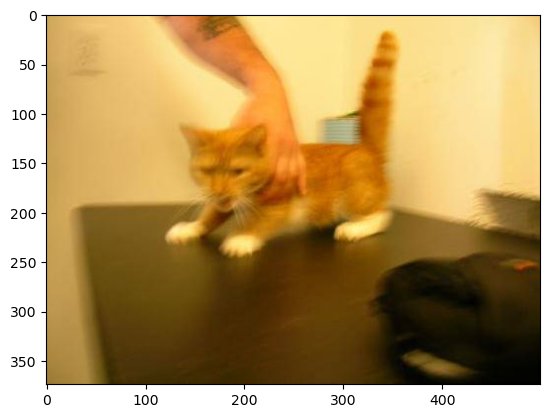

In [39]:
fig, ax = plt.subplots()
ax.imshow(cat0)
plt.show()

In [40]:
dog2 = plt.imread("data/dog.2.jpg")
print(type(dog2))
print(dog2.shape)

<class 'numpy.ndarray'>
(199, 187, 3)


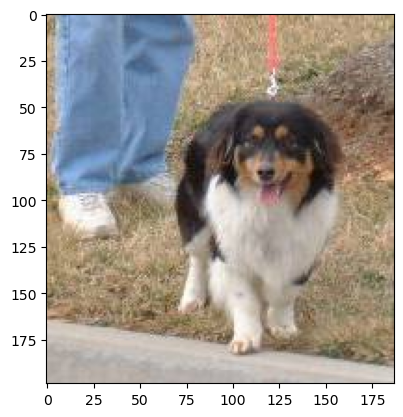

In [41]:
fig, ax = plt.subplots()
ax.imshow(dog2)
plt.show()

## 灰階化 grayscaling

- 降低圖片的複雜度，將三維陣列降維成二維陣列。
- 進而減少模型運算需求。

In [42]:
import cv2

grayscaled_dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2GRAY)
print(dog2.shape)
print(grayscaled_dog2.shape)

(199, 187, 3)
(199, 187)


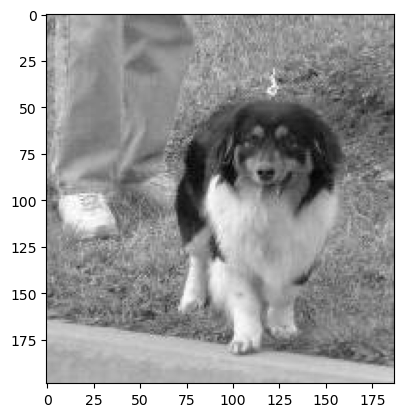

In [43]:
fig, ax = plt.subplots()
ax.imshow(grayscaled_dog2, cmap='gray')
plt.show()

## 閾值化 thresholding

- 進一步將灰階圖片轉換為黑白圖片。
- 低於閾值的給予白色（強度 0）、高於閾值的給予黑色（強度 255）。

In [44]:
retval, threshold_dog2 = cv2.threshold(grayscaled_dog2, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
print(retval)
print(grayscaled_dog2)
print(threshold_dog2)

100.0
[[148 170 178 ... 148 159 170]
 [138 169 170 ... 142 153 167]
 [147 166 147 ... 143 153 165]
 ...
 [174 175 176 ... 214 212 210]
 [177 177 176 ... 215 215 214]
 [176 176 175 ... 193 194 194]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


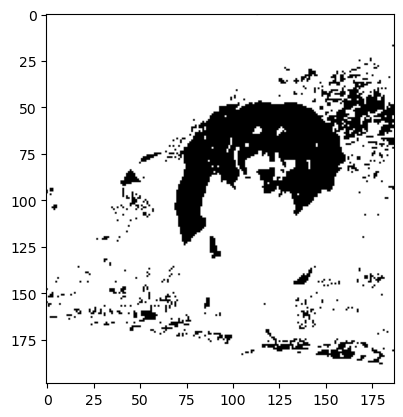

In [45]:
fig, ax = plt.subplots()
ax.imshow(threshold_dog2, cmap='gray')
plt.show()

## 大津閾值化 Otsu's Threshold

使用大津演算法決定閾值。

In [46]:
retval, threshold_dog2 = cv2.threshold(grayscaled_dog2, thresh=0, maxval=255, type=cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(retval)

132.0


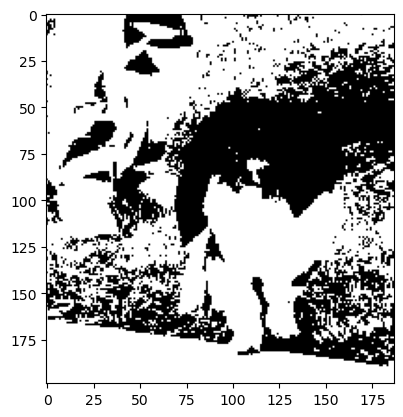

In [47]:
fig, ax = plt.subplots()
ax.imshow(threshold_dog2, cmap='gray')
plt.show()

## 影像降噪 Noise reduction

- 移除影像中不必要的雜訊，保留影像中較為重要的細節，進而使得到的圖像清晰。
- 影像降噪的方法稱為濾波器（Filter），有許多不同的濾波器可以採用，例如均值濾波或高斯平滑濾波。

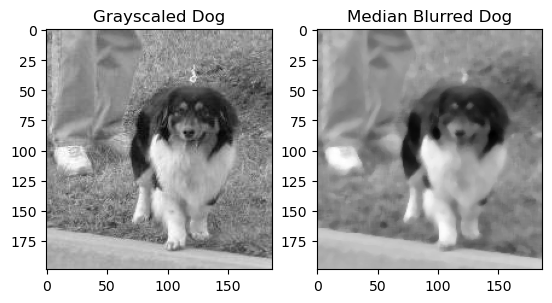

In [48]:
median_blur_dog2 = cv2.medianBlur(grayscaled_dog2, ksize=5)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(grayscaled_dog2, cmap='gray')
axes[0].set_title("Grayscaled Dog")
axes[1].imshow(median_blur_dog2, cmap='gray')
axes[1].set_title("Median Blurred Dog")
plt.show()

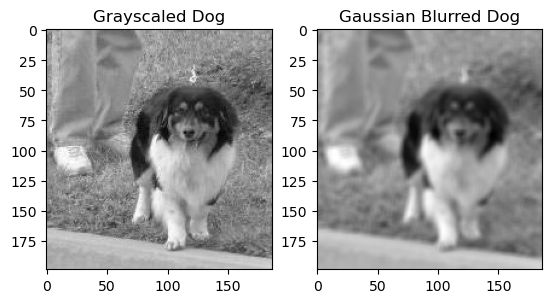

In [49]:
gaussian_blur_dog2 = cv2.GaussianBlur(grayscaled_dog2, ksize=(5, 5), sigmaX=7)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(grayscaled_dog2, cmap='gray')
axes[0].set_title("Grayscaled Dog")
axes[1].imshow(gaussian_blur_dog2, cmap='gray')
axes[1].set_title("Gaussian Blurred Dog")
plt.show()

## 影像降噪後再進行閾值化

In [50]:
median_blur_dog2 = cv2.medianBlur(grayscaled_dog2, ksize=5)
retval, threshold_dog2 = cv2.threshold(median_blur_dog2, thresh=0, maxval=255, type=cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(retval)

134.0


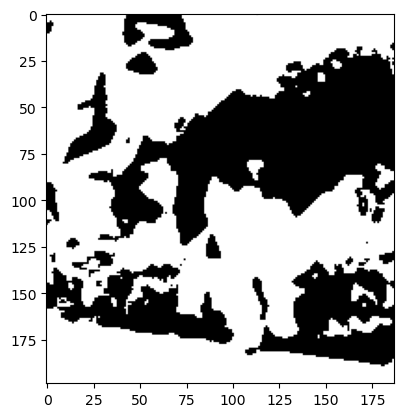

In [51]:
fig, ax = plt.subplots()
ax.imshow(threshold_dog2, cmap='gray')
plt.show()

## 邊緣偵測 Edge detection

標記影像中強度變化明顯的點。

In [52]:
edges_dog2 = cv2.Canny(grayscaled_dog2, 0, 255)

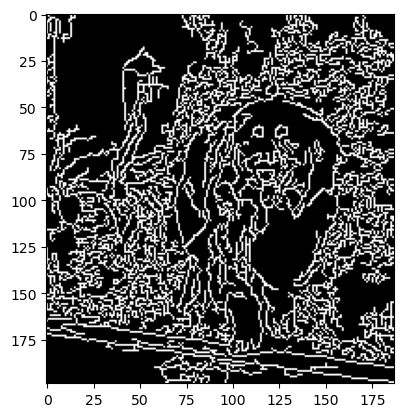

In [53]:
fig, ax = plt.subplots()
ax.imshow(edges_dog2, cmap='gray')
plt.show()